As westernized societies become more concerned about climate change, initiatives have been implemented to incentivize building owners and operators to reduce the energy use of their buildings. The Energy Star score was developed as a way to benchmark building energy use and to establish standards as to what can be considered a high-performing (low energy use) building. The score is provided on a scale of 1 to 100, which represents the percentile of buildings that have poorer energy performance (normalized for weather and building area) than the building being rated. Another metric used to characterize building enery use is the energy use intensity (EUI), which is the total annual energy consumption of a building divided by its floor area (units of kBtu/SF-yr). 

For buildings in most cities, obtaining an Energy Star score is voluntary, however, the city of San Francisco passed the Existing Commercial Buildings Energy Performance Ordinance in 2011, which requires annual benchmarking through Energy Star. The graph of building EUI vs Energy Stare score is shown below.   **Scatter plot shows relationship between two variables. Potentially add regression line**

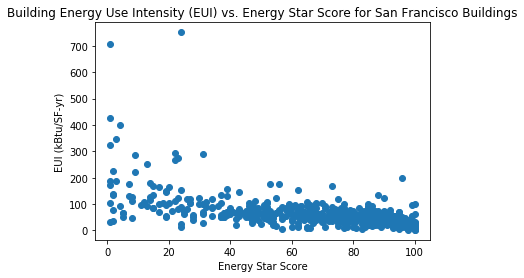

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('San_Francisco_Building_Data.csv')
x = df['ENERGY_STAR_Score']
y = df['SiteEUI']

%matplotlib inline
plt.scatter(x,y)
plt.ylabel('EUI (kBtu/SF-yr)')
plt.xlabel('Energy Star Score')
plt.title('Building Energy Use Intensity (EUI) vs. Energy Star Score for San Francisco Buildings')
plt.show()

This graph indicates that as the building EUI decreases, the Energy Star score increases, which is expected. It also shows that the building EUIs converge at higher scores, whereas the low scores show extreme variability. This variability is shown in the boxplot below. **Shows outliers and distribution. First box plot: all data, question source of variance. Investigate bin box plot. Discuss outliers, skewed data, not normal**

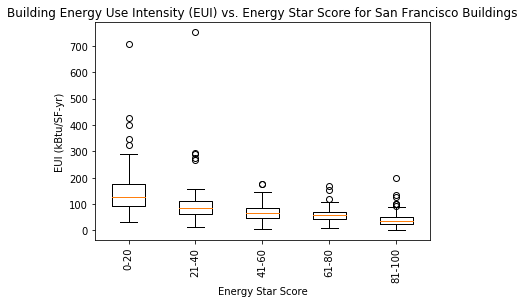

In [5]:
df = pd.read_csv('San_Francisco_Building_Data.csv')
x = df['ENERGY_STAR_Score']
y = df['SiteEUI']

fig = plt.figure()
ax = fig.add_subplot(111)

a = y[x<21]
b = y[(x > 20) & (x <= 40)]
c = y[(x > 40) & (x <= 60)]
d = y[(x > 60) & (x <= 80)]
e = y[(x > 80) & (x <= 100)]

label_names = ['0-20','21-40','41-60','61-80','81-100']
plt.ylabel('EUI (kBtu/SF-yr)')
plt.xlabel('Energy Star Score')
plt.title('Building Energy Use Intensity (EUI) vs. Energy Star Score for San Francisco Buildings')
ax.boxplot([a,b,c,d,e])
ax.set_xticklabels(label_names,rotation=90)
plt.show()

I wanted to investigate whether we could make any conjectures as to why some of these buildings might have EUIs greater than 300 kBtu/SF-yr, so I plotted the EUIs based on building type for the three main utilities in California. These utilities are:
1. Pacific Gas and Electric (PG&E) - San Francisco area utility provider. Representative of northern California region.
2. Southern California Edison (SCE) - Los Angeles area utility provider. Representative of middle California region.
3. San Diego Gas and Electric (SDG&E) - San Diego area utility provider. Representative of southern California region.

I opted to plot the same data for multiple utilities to validate that the differences between building EUI based on building type was due to how the building was actually being used as opposed to weather differences or data bias. 
**Mention t-test**

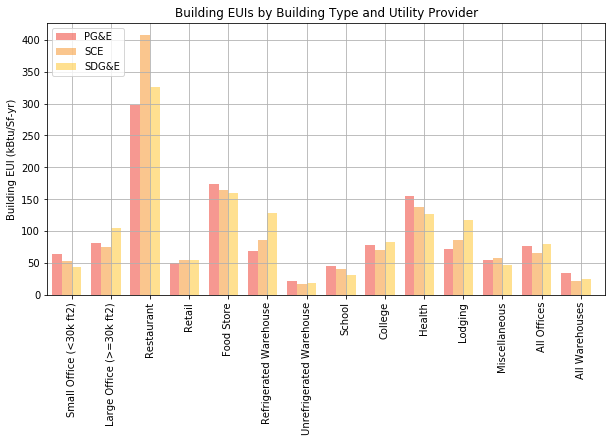

In [6]:
df = pd.read_csv('CaliforniaEUI.csv')
BuildingType = df['BuildingType']
PGE = df['PG&E']
SCE = df['SCE']
SDGE = df['SDG&E']

# Setting the positions and width for the bars
pos = list(range(len(df['PG&E'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df['PG&E'],width,alpha=0.5,color='#EE3224',label=df['BuildingType'][0])
plt.bar([p + width for p in pos],df['SCE'],width,alpha=0.5,color='#F78F1E',label=df['BuildingType'][1])
plt.bar([p + width*2 for p in pos],df['SDG&E'],width,alpha=0.5,color='#FFC222',label=df['BuildingType'][2])

# Plot attributes
ax.set_ylabel('Building EUI (kBtu/Sf-yr)')
ax.set_title('Building EUIs by Building Type and Utility Provider')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['BuildingType'],rotation=90)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['SCE']+20)] )
plt.legend(['PG&E', 'SCE', 'SDG&E'], loc='upper left')
plt.grid()
plt.show()

The grouped bar chart above shows us that restaurants have by far the greatest energy use intensity of all the building types regardless of location, as the minimum EUI of all three utilities in the restaurant category is the PG&E average at 300 kBtu/SF-yr. In comparison, the next largest EUI group is grocery stores (shown as "Food Store"), in which PG&E peaked at 175 kBtu/SF-yr. Therefore, it is likely that the buildings in our first plot with EUIs greater than 300 kBtu/SF-yr are restaurants. Why, then, do restaurants have a greater EUI as compared to other building types?

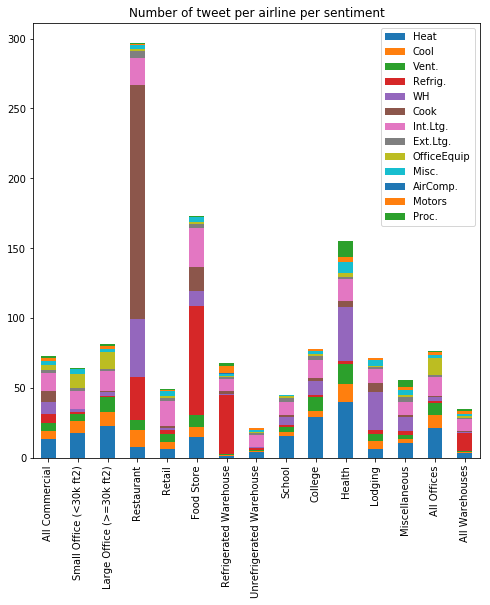

In [7]:
df = pd.read_csv('PGE_EndUseBreakdown.csv')
BuildingType = df['BuildingType']
ax = df.drop(['Total'],axis=1).plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title='Number of tweet per airline per sentiment')
ax.set_xticklabels(BuildingType,rotation=90)
plt.show()

Sources
1. San Francisco Benchmarking Report 
    http://uli.org/wp-content/uploads/ULI-Documents/SFenergybenchmarkingreport.pdf

2. California Commercial End Use Survey
http://www.energy.ca.gov/2006publications/CEC-400-2006-005/CEC-400-2006-005.PDF

3. Creating Grouped Bar Plots
https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html

4. Creating Sacked Bar Charts
https://chrisalbon.com/python/matplotlib_stacked_bar_plot.html